In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')


In [239]:
Data = pd.read_csv("day - day.csv")

In [240]:
Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [241]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [242]:
Data.isnull().sum()   ##Checking for any Null Values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [243]:
Y = Data['cnt']

##dte is removed as already year and month is given
##instant is removed as it doesnt provide any info
## casual and registered are removed as their sum gives cnt.

X = Data.drop(['dteday','instant','casual','registered','cnt'], axis = 1 )
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300


In [244]:
##finding the correlation between independent variables
X.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506


In [245]:
## pair of independent variables with correlation greater than 0.5

k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['season', 'mnth'],
  ['mnth', 'season'],
  ['weathersit', 'hum'],
  ['temp', 'atemp'],
  ['atemp', 'temp'],
  ['hum', 'weathersit']],
 6)

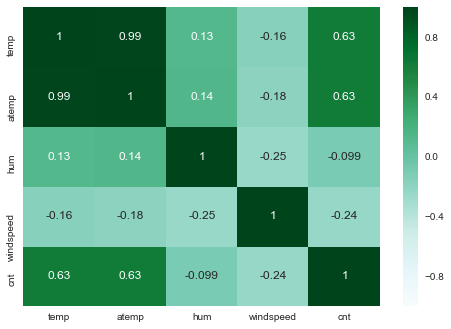

In [246]:
##ploting haetmap between all the continuous variables

sns.heatmap(Data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [247]:
##From the above, its clear that temp and atemp are highly correlated. 
##So we can omit one of the variable as the information from either one is provided by another.

In [248]:
##Calculating vif

# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

season         21.308815
yr              1.953167
mnth           15.255108
holiday         1.100513
weekday         3.123654
workingday      3.421400
weathersit     13.188651
temp          497.414303
atemp         562.356905
hum            29.333418
windspeed       5.302635
dtype: float64

In [249]:
VIF[VIF == VIF.max()].index[0]

'atemp'

In [250]:
##As vif value is high for atemp, atemp can be removed.

X = X.drop(['atemp'], axis = 1 )
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300


In [251]:
X.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

X.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

X.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

X.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300


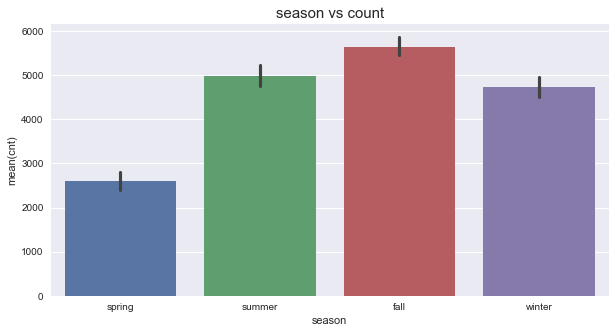

In [252]:
plt.figure(figsize=[10,5])
sns.barplot(X['season'],Y)
plt.title('season vs count', fontsize =15)
plt.show()

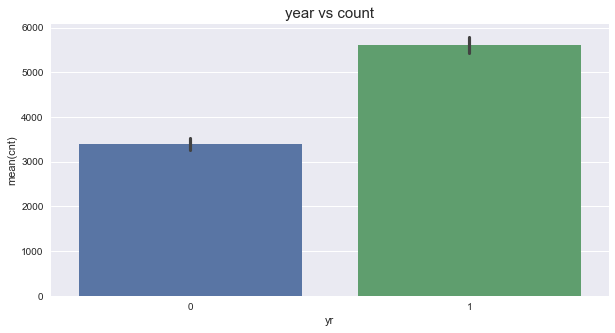

In [253]:
plt.figure(figsize=[10,5])
sns.barplot(X['yr'],Y)
plt.title('year vs count', fontsize =15)
plt.show()

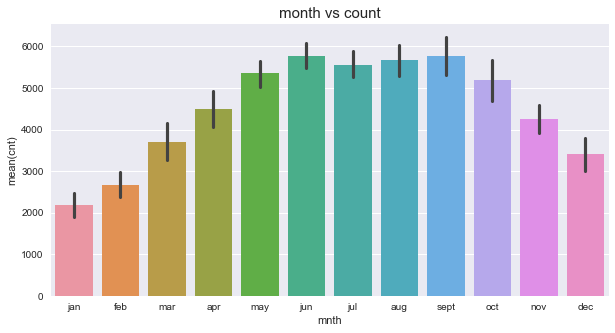

In [254]:
plt.figure(figsize=[10,5])
sns.barplot(X['mnth'],Y)
plt.title('month vs count', fontsize =15)
plt.show()

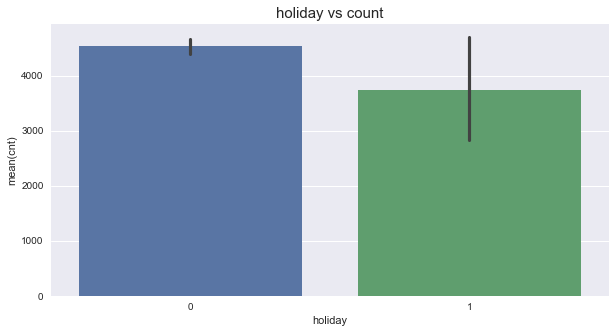

In [255]:
plt.figure(figsize=[10,5])
sns.barplot(X['holiday'],Y)
plt.title('holiday vs count', fontsize =15)
plt.show()

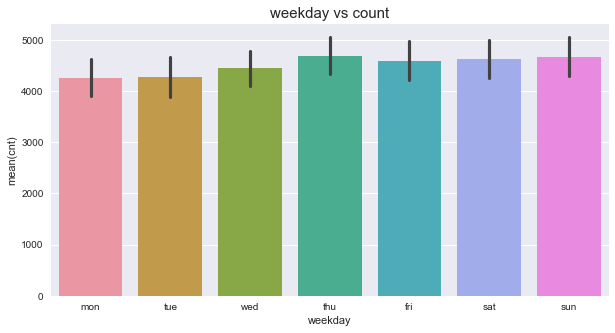

In [256]:
plt.figure(figsize=[10,5])
sns.barplot(X['weekday'],Y)
plt.title('weekday vs count', fontsize =15)
plt.show()

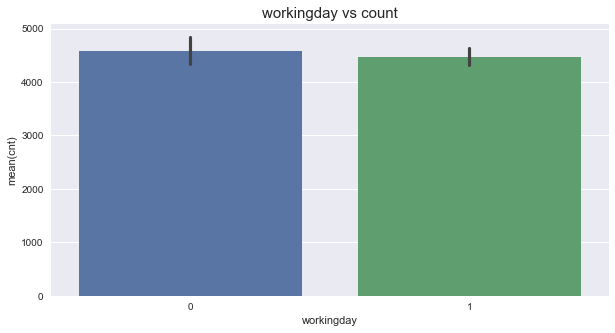

In [257]:
plt.figure(figsize=[10,5])
sns.barplot(X['workingday'],Y)
plt.title('workingday vs count', fontsize =15)
plt.show()

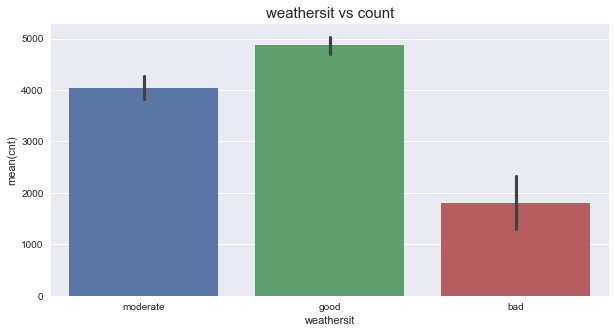

In [258]:
plt.figure(figsize=[10,5])
sns.barplot(X['weathersit'],Y)
plt.title('weathersit vs count', fontsize =15)
plt.show()

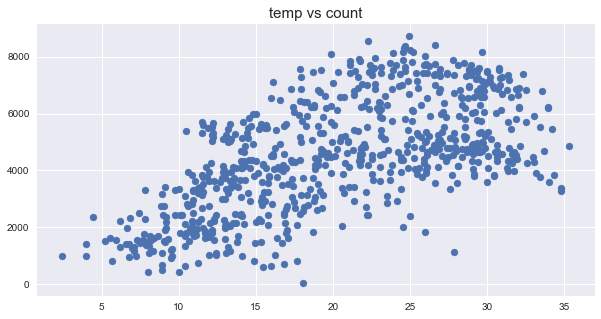

In [259]:
plt.figure(figsize=[10,5])
plt.scatter(X['temp'],Y)
plt.title('temp vs count', fontsize =15)
plt.show()

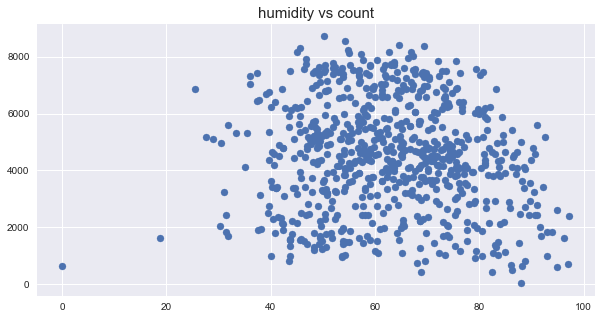

In [260]:
plt.figure(figsize=[10,5])
plt.scatter(X['hum'],Y)
plt.title('humidity vs count', fontsize =15)
plt.show()

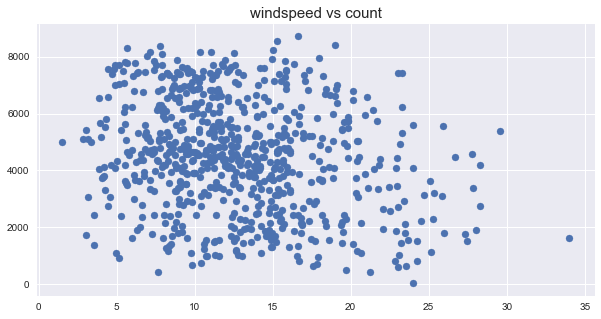

In [261]:
plt.figure(figsize=[10,5])
plt.scatter(X['windspeed'],Y)
plt.title('windspeed vs count', fontsize =15)
plt.show()

In [262]:
X = pd.get_dummies(data=X,columns=["season"])
X = pd.get_dummies(data=X,columns=["weathersit"])
X = pd.get_dummies(data=X,columns=["mnth"])
X = pd.get_dummies(data=X,columns=["weekday"])

In [263]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_apr',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [264]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,1,14.110847,80.5833,10.749882,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [266]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [267]:
lr.coef_

array([  1.95230898e+03,  -8.60714060e+02,  -1.68991957e+02,
         1.11782434e+02,  -1.41770509e+01,  -4.00457714e+01,
        -1.77342573e+16,  -1.77342573e+16,  -1.77342573e+16,
        -1.77342573e+16,   6.78737319e+15,   6.78737319e+15,
         6.78737319e+15,   5.10868000e+15,   5.10868000e+15,
         5.10868000e+15,   5.10868000e+15,   5.10868000e+15,
         5.10868000e+15,   5.10868000e+15,   5.10868000e+15,
         5.10868000e+15,   5.10868000e+15,   5.10868000e+15,
         5.10868000e+15,   8.88200338e+16,   8.88200338e+16,
         8.88200338e+16,   8.88200338e+16,   8.88200338e+16,
         8.88200338e+16,   8.88200338e+16])

In [268]:

from sklearn.feature_selection import RFE
rfe = RFE(lr)             
rfe = rfe.fit(X_train, Y_train)

In [269]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('yr', False, 12),
 ('holiday', False, 13),
 ('workingday', False, 14),
 ('temp', False, 15),
 ('hum', False, 17),
 ('windspeed', False, 16),
 ('season_fall', False, 9),
 ('season_spring', False, 11),
 ('season_summer', False, 10),
 ('season_winter', False, 8),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_apr', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 5),
 ('mnth_jun', False, 4),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', False, 7),
 ('weekday_fri', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', True, 1),
 ('weekday_tue', True, 1),
 ('weekday_wed', True, 1)]

In [270]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_apr',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_mar', 'mnth_nov',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [271]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,weathersit_bad,weathersit_good,weathersit_moderate,mnth_apr,mnth_dec,mnth_feb,mnth_jan,mnth_mar,mnth_nov,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
683,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
645,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
640,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [272]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(Y_train, X_train_lm1).fit()

lr1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     34.23
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           7.69e-64
Time:                        12:46:43   Log-Likelihood:                -4419.9
No. Observations:                 511   AIC:                             8870.
Df Residuals:                     496   BIC:                             8933.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.562e+15    1.7e+16      0.327      0.744   -2.79e+16     3.9e+16
weathersit_bad      -6.737e+15   2.06e+16     -0.327      0.744   -4.72e+16    3.38e+16
weathersit_good     -6.737e+15   2.06e+16     -0.327      0.744   -4.72e+16    3.38e+16
weathersit_moderate -6.737e+15   2.06e+16     -0.327      0.744   -4.72e+16    3.38e+16
mnth_apr            -1120.1383    228.900     -4.894      0.000   -1569.872    -670.405
mnth_dec            -2022.3251    245.299     -8.244      0.000   -2504.278   -1540.372
mnth_feb            -2938.9871    243.792    -12.055      0.000   -3417.979   -2459.996
mnth_jan            -3451.8822    226.848    -15.217      0.000   -3897.583   -3006.181
mnth_mar            -1648.9567    266.565     -6.186      0.000   -2172.692   -1125.222
mnth_nov            -1396.4098    222.393     -6.279      0.000   -1833.358    -959.462
weekday_fri          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_mon          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_sat          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_sun          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_thu          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_tue          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
weekday_wed          1.175e+15   3.59e+15      0.327      0.744   -5.89e+15    8.24e+15
==============================================================================
Omnibus:                       43.463   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.611
Skew:                           0.067   Prob(JB):                     0.000672
Kurtosis:                       2.183   Cond. No.                     3.40e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,weathersit_bad,inf
1,weathersit_good,inf
2,weathersit_moderate,inf
9,weekday_fri,inf
10,weekday_mon,inf
11,weekday_sat,inf
12,weekday_sun,inf
13,weekday_thu,inf
14,weekday_tue,inf
15,weekday_wed,inf


In [274]:
##REMOVING VARIABLES WITH HIGH VIF
X_train_rfe2 = X_train_rfe.drop(['weathersit_bad','weathersit_good','weathersit_moderate','weekday_fri','weekday_mon','weekday_sat','weekday_sun','weekday_thu','weekday_tue','weekday_wed'], axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(Y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     57.09
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           9.31e-54
Time:                        12:46:43   Log-Likelihood:                -4460.2
No. Observations:                 511   AIC:                             8934.
Df Residuals:                     504   BIC:                             8964.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5590.4569     92.077     60.715      0.000    5409.555    5771.359
mnth_apr   -1255.1615    244.797     -5.127      0.000   -1736.109    -774.214
mnth_dec   -2295.0622    260.861     -8.798      0.000   -2807.572   -1782.552
mnth_feb   -2923.5885    260.861    -11.207      0.000   -3436.098   -2411.079
mnth_jan   -3480.2347    242.450    -14.354      0.000   -3956.573   -3003.897
mnth_mar   -1786.4882    281.457     -6.347      0.000   -2339.462   -1233.514
mnth_nov   -1337.2654    237.995     -5.619      0.000   -1804.850    -869.681
==============================================================================
Omnibus:                        6.146   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.121
Skew:                          -0.027   Prob(JB):                        0.127
Kurtosis:                       2.563   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,mnth_apr,1.0
1,mnth_dec,1.0
2,mnth_feb,1.0
3,mnth_jan,1.0
4,mnth_mar,1.0
5,mnth_nov,1.0
